# In this notebook you will find....

## Importing necessary libraries for geospatial analysis

## Importing the files for the analysis

## Wrangling, merging and cleaning the data

## Creating a choropleth map with the price variable

### Importing necessary libraries

In [1]:
# Import libraries needed for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import geopandas as gpd
import geoplot

### Importing files

In [2]:
path = r"C:\Users\Carter\Documents\Data Immersion\Advanced Analytics and Dashboard Design\NY Airbnb Self-Project"

In [3]:
# Import '.shp file'
new_york = gpd.read_file(os.path.join(path, '02 Data', 'Original Data','geo_export_a7ba5964-7194-4639-a6ff-8037af72fbdf.shp'))

In [21]:
# Check to get layout of '.shp' file
new_york

,boro_code,boro_name,shape_area,shape_leng,geometry
0,1.0,Manhattan,6.366038e+08,361611.823950,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
1,2.0,Bronx,1.187245e+09,464650.051807,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,3.0,Brooklyn,1.934091e+09,729592.941749,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,4.0,Queens,3.044042e+09,900087.667191,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."
4,5.0,Staten Island,1.623757e+09,325956.009000,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."


In [17]:
new_york.shape

(5, 5)

In [4]:
# Import main Airbnb data set
airbnb_df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','airbnb_ny_cleaned.csv'))

In [20]:
airbnb_df

,Unnamed: 0,id,airbnb_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,2539,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,2595,2,355
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,3647,1,365
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,3831,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,5022,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,36484665,2,9
48891,48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,36485057,2,36
48892,48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,36485431,1,27
48893,48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,36485609,6,2


### Wrangle, merge and clean data

In [5]:
# Change name of 'boro_name' to 'neighbourhood_group'
new_york.rename(columns = {'boro_name':'neighbourhood_group'}, inplace = True)

In [6]:
new_york

,boro_code,neighbourhood_group,shape_area,shape_leng,geometry
0,1.0,Manhattan,6.366038e+08,361611.823950,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
1,2.0,Bronx,1.187245e+09,464650.051807,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,3.0,Brooklyn,1.934091e+09,729592.941749,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,4.0,Queens,3.044042e+09,900087.667191,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."
4,5.0,Staten Island,1.623757e+09,325956.009000,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."


In [7]:
# Drop boro_code column
new_york_2 = new_york.drop(columns = ['boro_code'])

In [8]:
new_york_2

,neighbourhood_group,shape_area,shape_leng,geometry
0,Manhattan,6.366038e+08,361611.823950,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
1,Bronx,1.187245e+09,464650.051807,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,Brooklyn,1.934091e+09,729592.941749,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,Queens,3.044042e+09,900087.667191,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."
4,Staten Island,1.623757e+09,325956.009000,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."


In [9]:
# Test merge dataset without overwriting
pd.merge(new_york_2,airbnb_df, on = ['neighbourhood_group'], how = 'outer', indicator = True)

,neighbourhood_group,shape_area,shape_leng,geometry,Unnamed: 0,id,airbnb_name,host_id,host_name,neighbourhood,...,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,_merge
0,Manhattan,6.366038e+08,361611.82395,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,...,-73.98377,Entire home/apt,225,1,45,2019-05-21,2595,2,355,both
1,Manhattan,6.366038e+08,361611.82395,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,...,-73.94190,Private room,150,3,0,NaN,3647,1,365,both
2,Manhattan,6.366038e+08,361611.82395,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,...,-73.94399,Entire home/apt,80,10,9,2018-11-19,5022,1,0,both
3,Manhattan,6.366038e+08,361611.82395,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Murray Hill,...,-73.97500,Entire home/apt,200,3,74,2019-06-22,5099,1,129,both
4,Manhattan,6.366038e+08,361611.82395,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",7,5178,Large Furnished Room Near B'way,8967,Shunichi,Hell's Kitchen,...,-73.98493,Private room,79,2,430,2019-06-24,5178,1,220,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Staten Island,1.623757e+09,325956.00900,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",48441,36267546,A Home Away From Home,233485864,Jeannie,New Dorp Beach,...,-74.10240,Private room,40,1,0,NaN,36267546,2,341,both
48891,Staten Island,1.623757e+09,325956.00900,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",48446,36270376,"Beautiful home on Staten Island, walk to ferry",444904,Janine,St. George,...,-74.07987,Entire home/apt,100,365,0,NaN,36270376,1,342,both
48892,Staten Island,1.623757e+09,325956.00900,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",48533,36310353,Staten Island Resort minutes from ferry! Amazi...,28586423,Danielle,Stapleton,...,-74.07301,Entire home/apt,450,5,0,NaN,36310353,1,88,both
48893,Staten Island,1.623757e+09,325956.00900,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",48649,36355110,PRIVATE ROOM IN STATEN ISLAND -FOR LADIES ONLY,201187671,Tuana,Shore Acres,...,-74.06625,Private room,54,4,0,NaN,36355110,1,89,both


The number of columns are good (17 + 4 = 21) so I think it's good to move onto a true merge.

In [10]:
# Merge the 'airbnb_df' dataframe into the 'new_york' dataframe
df_merged = new_york_2.merge(airbnb_df, on = ['neighbourhood_group'], how = 'outer', indicator = True)

In [11]:
df_merged

,neighbourhood_group,shape_area,shape_leng,geometry,Unnamed: 0,id,airbnb_name,host_id,host_name,neighbourhood,...,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,_merge
0,Manhattan,6.366038e+08,361611.82395,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,...,-73.98377,Entire home/apt,225,1,45,2019-05-21,2595,2,355,both
1,Manhattan,6.366038e+08,361611.82395,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,...,-73.94190,Private room,150,3,0,NaN,3647,1,365,both
2,Manhattan,6.366038e+08,361611.82395,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,...,-73.94399,Entire home/apt,80,10,9,2018-11-19,5022,1,0,both
3,Manhattan,6.366038e+08,361611.82395,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Murray Hill,...,-73.97500,Entire home/apt,200,3,74,2019-06-22,5099,1,129,both
4,Manhattan,6.366038e+08,361611.82395,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",7,5178,Large Furnished Room Near B'way,8967,Shunichi,Hell's Kitchen,...,-73.98493,Private room,79,2,430,2019-06-24,5178,1,220,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Staten Island,1.623757e+09,325956.00900,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",48441,36267546,A Home Away From Home,233485864,Jeannie,New Dorp Beach,...,-74.10240,Private room,40,1,0,NaN,36267546,2,341,both
48891,Staten Island,1.623757e+09,325956.00900,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",48446,36270376,"Beautiful home on Staten Island, walk to ferry",444904,Janine,St. George,...,-74.07987,Entire home/apt,100,365,0,NaN,36270376,1,342,both
48892,Staten Island,1.623757e+09,325956.00900,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",48533,36310353,Staten Island Resort minutes from ferry! Amazi...,28586423,Danielle,Stapleton,...,-74.07301,Entire home/apt,450,5,0,NaN,36310353,1,88,both
48893,Staten Island,1.623757e+09,325956.00900,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",48649,36355110,PRIVATE ROOM IN STATEN ISLAND -FOR LADIES ONLY,201187671,Tuana,Shore Acres,...,-74.06625,Private room,54,4,0,NaN,36355110,1,89,both


In [12]:
# Check the '_merge' column
df_merged['_merge'].value_counts(dropna = False)

both          48895
left_only         0
right_only        0
Name: _merge, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

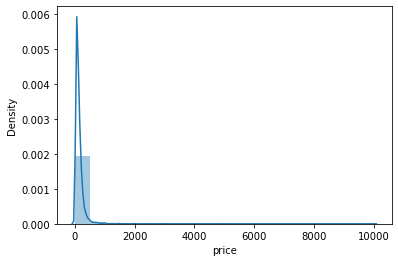

In [13]:
# Make a histogram of prices of Airbnb to check for any high numbers
sns.distplot(df_merged['price'], bins = 20)

I believe I will drop the Airbnbs that ae over $1500 since they will skew my analysis and there are only 139 rows with it with is less than 1% than my data set.

In [14]:
df_drop = df_merged[df_merged['price'] > 1500]

In [15]:
df_drop

,neighbourhood_group,shape_area,shape_leng,geometry,Unnamed: 0,id,airbnb_name,host_id,host_name,neighbourhood,...,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,_merge
227,Manhattan,6.366038e+08,361611.823950,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Upper West Side,...,-73.98697,Entire home/apt,2000,30,30,2018-05-05,174966,11,0,both
429,Manhattan,6.366038e+08,361611.823950,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Upper West Side,...,-73.96931,Private room,3000,7,0,NaN,363673,1,365,both
686,Manhattan,6.366038e+08,361611.823950,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",1480,664047,Lux 2Bed/2.5Bath Central Park Views,836168,Henry,Upper West Side,...,-73.98573,Entire home/apt,2000,30,59,2016-01-28,664047,11,364,both
934,Manhattan,6.366038e+08,361611.823950,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",2018,893413,Architecturally Stunning Former Synagogue!,4751930,Martin,East Village,...,-73.98179,Entire home/apt,2500,30,15,2019-07-01,893413,1,89,both
1166,Manhattan,6.366038e+08,361611.823950,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",2523,1301321,West Village Penthouse-terrace/view,2214774,Ben And Jess,West Village,...,-74.00412,Entire home/apt,1899,7,18,2015-10-09,1301321,1,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44273,Queens,3.044042e+09,900087.667191,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...",17811,13963005,Gorgeous 2 Bedroom apartment,41870118,Iveta,Forest Hills,...,-73.83746,Entire home/apt,2350,365,0,NaN,13963005,1,364,both
47579,Queens,3.044042e+09,900087.667191,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...",42680,33133321,Majestic Mansion LifeStyle :),74373729,Shah,Bayside,...,-73.77069,Entire home/apt,2600,6,3,2019-05-30,33133321,1,362,both
47828,Queens,3.044042e+09,900087.667191,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...",44429,34221161,Room with sofa bed or air mattress,9295237,Noelle,Astoria,...,-73.91276,Private room,2000,365,0,NaN,34221161,2,0,both
48264,Queens,3.044042e+09,900087.667191,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...",47350,35706068,wait until later,35741633,Chen,Long Island City,...,-73.94294,Entire home/apt,2000,1,0,NaN,35706068,1,365,both


In [16]:
# Create dataframe without Airbnb's over $1500
df_edit = df_merged[df_merged['price'] < 1500]

In [19]:
df_edit

,neighbourhood_group,shape_area,shape_leng,geometry,Unnamed: 0,id,airbnb_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,6.366038e+08,361611.82395,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,2595,2,355
1,Manhattan,6.366038e+08,361611.82395,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,3647,1,365
2,Manhattan,6.366038e+08,361611.82395,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,5022,1,0
3,Manhattan,6.366038e+08,361611.82395,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,5099,1,129
4,Manhattan,6.366038e+08,361611.82395,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",7,5178,Large Furnished Room Near B'way,8967,Shunichi,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,5178,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Staten Island,1.623757e+09,325956.00900,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",48441,36267546,A Home Away From Home,233485864,Jeannie,New Dorp Beach,40.56506,-74.10240,Private room,40,1,0,NaN,36267546,2,341
48891,Staten Island,1.623757e+09,325956.00900,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",48446,36270376,"Beautiful home on Staten Island, walk to ferry",444904,Janine,St. George,40.64005,-74.07987,Entire home/apt,100,365,0,NaN,36270376,1,342
48892,Staten Island,1.623757e+09,325956.00900,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",48533,36310353,Staten Island Resort minutes from ferry! Amazi...,28586423,Danielle,Stapleton,40.62878,-74.07301,Entire home/apt,450,5,0,NaN,36310353,1,88
48893,Staten Island,1.623757e+09,325956.00900,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",48649,36355110,PRIVATE ROOM IN STATEN ISLAND -FOR LADIES ONLY,201187671,Tuana,Shore Acres,40.61283,-74.06625,Private room,54,4,0,NaN,36355110,1,89


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

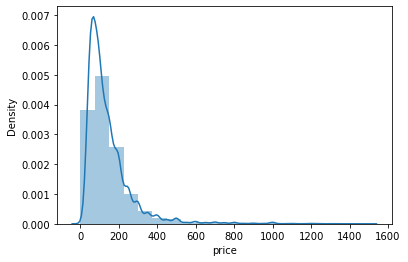

In [30]:
# Create histogram of the new dataframe that was created.
sns.distplot(df_edit['price'], bins = 20)

In [18]:
# Drop the categorial columns so the 'to_file' doesn't break
df_edit.drop(columns = '_merge', inplace = True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
# Export the new dataframe
out = r"C:\Users\Carter\Documents\Data Immersion\Advanced Analytics and Dashboard Design\NY Airbnb Self-Project\02 Data\Prepared Data\ny_airbnb_price.shp"
df_edit.to_file(out)

## Plotting choropleth

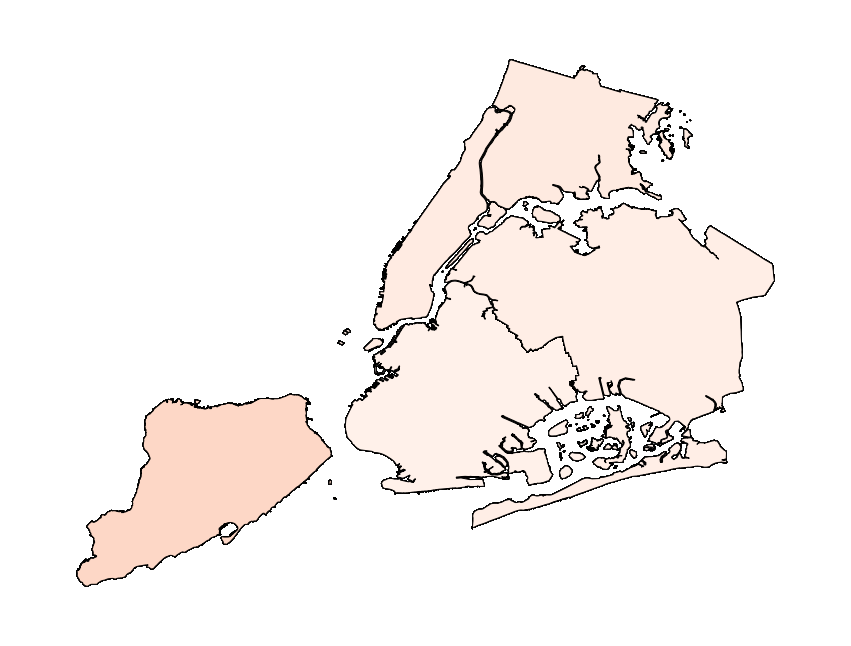

In [22]:
gp = geoplot.choropleth(
    df_edit, hue = df_edit['price'], scheme = None,
    cmap='Reds', figsize=(15, 15)
)

First off, after a long day of doing mind numbing work and being stuck in my head, I have thought more clearly of my research questions. So the broadest I can get my question is "What affects the price of an Airbnb in NYC?" Then my funneling questiosn are the one from the 6.1 Exercise and the ones I am about to think of now. So, one thing I wanted to look at is how price varies geographically in NYC. As we can see in the map below, there are different hues of red. Meaning that there are different prices that affect it. Most notably in Staten Island! So, my next questions are, "What does Staten Island have that the other neighbourhoods don't? How does room type factor into high price, could a large population of "higher priced" rooms be more prevalent in Staten Island or more expensive areas of NYC?